<a href="https://colab.research.google.com/github/SoupayanGhosh/Crop_PRED/blob/main/Crop_Soil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This cell imports the necessary libraries for data manipulation, visualization, and machine learning.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as fx
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
import plotly.graph_objects as go

This function creates a Plotly scatter plot comparing actual and predicted values over their index.

In [ ]:
def plot_actual_vs_predicted(y_test, y_pred, title="Actual vs Predicted over Index"):
    # Create DataFrame for plotting
    df_plot = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})

    # Create figure
    fig = go.Figure()

    # Actual values trace
    fig.add_trace(go.Scatter(
    x=df_plot.index,
    y=df_plot["Actual"],
    mode='markers',
    name='Actual',
    marker=dict(color='blue', opacity=0.9, size=10)
    ))

    fig.add_trace(go.Scatter(
        x=df_plot.index,
        y=df_plot["Predicted"],
        mode='markers',
        name='Predicted',
        marker=dict(color='red', opacity=0.7)
    ))

    # Layout
    fig.update_layout(
        title="Actual vs Predicted over Index",
        xaxis_title="Index",
        yaxis_title="Value",
        template="plotly_dark",
        legend=dict(x=0.85, y=1),
        height = 800,
    )
    return fig

This function generates a Plotly scatter plot showing actual vs. predicted values with a diagonal line representing perfect prediction.

In [ ]:
def scatter_actual_vs_predicted(y_test, y_pred, title="Actual vs Predicted (Plotly)"):
    # Create DataFrame for plotting
    df_plot = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})

    # Create scatter plot
    fig = px.scatter(
        df_plot,
        x="Actual",
        y="Predicted",
        title=title,
        labels={"Actual": "Actual Values", "Predicted": "Predicted Values"},
        opacity=0.7
    )

    # Add perfect fit line (y = x)
    min_val = min(df_plot["Actual"].min(), df_plot["Predicted"].min())
    max_val = max(df_plot["Actual"].max(), df_plot["Predicted"].max())

    fig.add_shape(
        type="line",
        x0=min_val, y0=min_val,
        x1=max_val, y1=max_val,
        line=dict(color="red", dash="dash")
    )
    return fig

This cell loads the dataset from a CSV file into a pandas DataFrame and displays the first few rows.

In [ ]:
df = pd.read_csv("/content/crop.csv")
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


This cell provides a concise summary of the DataFrame, including the data types and non-null counts for each column.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


This cell generates descriptive statistics of the numerical columns in the DataFrame, such as count, mean, standard deviation, min, and max values.

In [ ]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


This cell checks for missing values in each column of the DataFrame and displays the count of null values.

In [ ]:
df.isna().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


This cell initializes an OrdinalEncoder object and creates a copy of the original DataFrame for encoding.

In [ ]:
od = OrdinalEncoder()
df_convt = df.copy()

This cell identifies and extracts the names of the categorical columns in the DataFrame (columns with 'object' dtype).

In [ ]:
categorical_col = df_convt.select_dtypes(include="object").columns
categorical_col

Index(['label'], dtype='object')

This cell applies Ordinal Encoding to the categorical columns in the copied DataFrame and converts the encoded values to integers.

In [ ]:
df_convt[categorical_col] = od.fit_transform(df[categorical_col]).astype(int)
df_convt

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,5


This cell separates the features (input variables) and the target variable ('label') from the encoded DataFrame.

In [ ]:
target = 'label'
features = df_convt.drop(target, axis=1)
target = df_convt[target]

features, target

(        N   P   K  temperature   humidity        ph    rainfall
 0      90  42  43    20.879744  82.002744  6.502985  202.935536
 1      85  58  41    21.770462  80.319644  7.038096  226.655537
 2      60  55  44    23.004459  82.320763  7.840207  263.964248
 3      74  35  40    26.491096  80.158363  6.980401  242.864034
 4      78  42  42    20.130175  81.604873  7.628473  262.717340
 ...   ...  ..  ..          ...        ...       ...         ...
 2195  107  34  32    26.774637  66.413269  6.780064  177.774507
 2196   99  15  27    27.417112  56.636362  6.086922  127.924610
 2197  118  33  30    24.131797  67.225123  6.362608  173.322839
 2198  117  32  34    26.272418  52.127394  6.758793  127.175293
 2199  104  18  30    23.603016  60.396475  6.779833  140.937041
 
 [2200 rows x 7 columns],
 0       20
 1       20
 2       20
 3       20
 4       20
         ..
 2195     5
 2196     5
 2197     5
 2198     5
 2199     5
 Name: label, Length: 2200, dtype: int64)

This cell splits the features and target variables into training and testing sets for model building and evaluation.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size=0.2,random_state=42,shuffle=True)

This cell imports the Linear Regression and Logistic Regression models from the scikit-learn library.

In [ ]:
from sklearn.linear_model import LogisticRegression,LinearRegression

This cell trains a Linear Regression model on the training data and evaluates its performance using various regression metrics.

In [ ]:
lr = LinearRegression()
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)
mse_lr = mean_squared_error(y_test,y_pred)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test,y_pred)
mae_lr = mean_absolute_error(y_test,y_pred)
ev_lr = explained_variance_score(y_test,y_pred)


print(f"\nModel: Linear Regression")
print(f"R² Score: {r2_lr:.4f}")
print(f"Mean Absolute Error: {mae_lr:.4f}")
print(f"Explained Variance Score: {ev_lr:.4f}")
print(f"Root Mean Squared Error: {rmse_lr:.4f}")


Model: Linear Regression
R² Score: 0.2563
Mean Absolute Error: 4.4335
Explained Variance Score: 0.2580
Root Mean Squared Error: 5.6102


This cell generates and displays a scatter plot comparing the actual and predicted values from the Linear Regression model.

In [ ]:
fig = scatter_actual_vs_predicted(y_test, y_pred)
fig.show()

This cell generates and displays a plot showing the actual and predicted values from the Linear Regression model over their index.

In [ ]:
fig = plot_actual_vs_predicted(y_test, y_pred)
fig.show()

This cell trains a Logistic Regression model on the training data and evaluates its performance using various regression metrics.

In [ ]:
lg = LogisticRegression(max_iter=200)
lg.fit(x_train,y_train)

y_pred = lg.predict(x_test)
mse_lg = mean_squared_error(y_test,y_pred)
rmse_lg = np.sqrt(mse_lg)
r2_lg = r2_score(y_test,y_pred)
mae_lg = mean_absolute_error(y_test,y_pred)
ev_lg = explained_variance_score(y_test,y_pred)


print(f"\nModel: Logistic Regression")
print(f"R² Score: {r2_lg:.4f}")
print(f"Mean Absolute Error: {mae_lg:.4f}")
print(f"Explained Variance Score: {ev_lg:.4f}")
print(f"Root Mean Squared Error: {rmse_lg:.4f}")


Model: Logistic Regression
R² Score: 0.8914
Mean Absolute Error: 0.4182
Explained Variance Score: 0.8916
Root Mean Squared Error: 2.1437


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



This cell generates and displays a scatter plot comparing the actual and predicted values from the Logistic Regression model.

In [ ]:
fig = scatter_actual_vs_predicted(y_test, y_pred)
fig.show()

This cell generates and displays a plot showing the actual and predicted values from the Logistic Regression model over their index.

In [ ]:
fig = plot_actual_vs_predicted(y_test, y_pred)
fig.show()

This cell imports the KNeighborsRegressor model from the scikit-learn library and initializes it.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=7, weights="distance")
knn.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=7, weights='distance')

This cell uses the trained KNN Regressor model to make predictions on the test data and evaluates its performance using various regression metrics.

In [ ]:
y_pred = knn.predict(x_test)
mse_knn = mean_squared_error(y_test,y_pred)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test,y_pred)
mae_knn = mean_absolute_error(y_test,y_pred)
ev_knn = explained_variance_score(y_test,y_pred)

print(f"\nModel: KNN Regressor")
print(f"R² Score: {r2_knn:.4f}")
print(f"Mean Absolute Error: {mae_knn:.4f}")
print(f"Explained Variance Score: {ev_knn:.4f}")
print(f"Root Mean Squared Error: {rmse_knn:.4f}")


Model: KNN Regressor
R² Score: 0.9584
Mean Absolute Error: 0.3533
Explained Variance Score: 0.9588
Root Mean Squared Error: 1.3271


This cell generates and displays a scatter plot comparing the actual and predicted values from the KNN Regressor model.

In [ ]:
fig = scatter_actual_vs_predicted(y_test, y_pred)
fig.show()

This cell generates and displays a plot showing the actual and predicted values from the KNN Regressor model over their index.

In [ ]:
fig = plot_actual_vs_predicted(y_test, y_pred)
fig.show()

This cell imports the DecisionTreeRegressor model from the scikit-learn library and initializes it with a specified max depth.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=7)
dt.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=7)

This cell uses the trained Decision Tree Regressor model to make predictions on the test data and evaluates its performance using various regression metrics.

In [ ]:
y_pred = dt.predict(x_test)
mse_dt = mean_squared_error(y_test,y_pred)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test,y_pred)
mae_dt = mean_absolute_error(y_test,y_pred)
ev_dt = explained_variance_score(y_test,y_pred)

print(f"\nModel: DECISION-TREE Regressor")
print(f"R² Score: {r2_dt:.4f}")
print(f"Mean Absolute Error: {mae_dt:.4f}")
print(f"Explained Variance Score: {ev_dt:.4f}")
print(f"Root Mean Squared Error: {rmse_dt:.4f}")


Model: DECISION-TREE Regressor
R² Score: 0.9190
Mean Absolute Error: 0.4601
Explained Variance Score: 0.9192
Root Mean Squared Error: 1.8510


This cell generates and displays a scatter plot comparing the actual and predicted values from the Decision Tree Regressor model.

In [ ]:
fig = scatter_actual_vs_predicted(y_test, y_pred)
fig.show()

This cell generates and displays a plot showing the actual and predicted values from the Decision Tree Regressor model over their index.

In [ ]:
fig = plot_actual_vs_predicted(y_test, y_pred)
fig.show()

This cell defines a base estimator for the AdaBoost Regressor model, specifying the maximum depth of the Decision Tree.

In [ ]:
base_estimator = DecisionTreeRegressor(max_depth=9)

This cell imports the AdaBoostRegressor model and initializes it with the base estimator, number of estimators, and learning rate. It then trains the model on the training data.

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
#ada = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=9), learning_rate=0.5372059823454584, loss = "exponential")
ada = AdaBoostRegressor(estimator=base_estimator, n_estimators=200, learning_rate=0.5)
ada.fit(x_train, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=9),
                  learning_rate=0.5, n_estimators=200)

This cell uses the trained AdaBoost Regressor model to make predictions on the test data and evaluates its performance using various regression metrics.

In [ ]:
y_pred = ada.predict(x_test)
mse_ada = mean_squared_error(y_test,y_pred)
rmse_ada = np.sqrt(mse_ada)
r2_ada = r2_score(y_test,y_pred)
mae_ada = mean_absolute_error(y_test,y_pred)
ev_ada = explained_variance_score(y_test,y_pred)

print(f"\nModel: ADABOOST Regressor")
print(f"R² Score: {r2_ada:.4f}")
print(f"Mean Absolute Error: {mae_ada:.4f}")
print(f"Explained Variance Score: {ev_ada:.4f}")
print(f"Root Mean Squared Error: {rmse_ada:.4f}")


Model: ADABOOST Regressor
R² Score: 0.9714
Mean Absolute Error: 0.1194
Explained Variance Score: 0.9716
Root Mean Squared Error: 1.1005


This cell generates and displays a scatter plot comparing the actual and predicted values from the AdaBoost Regressor model.

In [ ]:
fig = scatter_actual_vs_predicted(y_test, y_pred)
fig.show()

This cell generates and displays a plot showing the actual and predicted values from the AdaBoost Regressor model over their index.

In [ ]:
fig = plot_actual_vs_predicted(y_test, y_pred)
fig.show()

This cell imports the RandomForestRegressor model from the scikit-learn library and initializes it with a specified number of estimators and max depth. It then trains the model on the training data.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
#rf = RandomForestRegressor(n_estimators=218,max_depth=2,min_samples_split=6,min_samples_leaf=3,max_features="log2")
rf = RandomForestRegressor(n_estimators=200, max_depth=7)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=7, n_estimators=200)

This cell uses the trained Random Forest Regressor model to make predictions on the test data and evaluates its performance using various regression metrics.

In [ ]:
y_pred = rf.predict(x_test)
mse_rf = mean_squared_error(y_test,y_pred)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test,y_pred)
mae_rf = mean_absolute_error(y_test,y_pred)
ev_rf = explained_variance_score(y_test,y_pred)

print(f"\nModel: Random Forest Regressor")
print(f"R² Score: {r2_rf:.4f}")
print(f"Mean Absolute Error: {mae_rf:.4f}")
print(f"Explained Variance Score: {ev_rf:.4f}")
print(f"Root Mean Squared Error: {rmse_rf:.4f}")


Model: Random Forest Regressor
R² Score: 0.9219
Mean Absolute Error: 0.7106
Explained Variance Score: 0.9227
Root Mean Squared Error: 1.8185


This cell generates and displays a scatter plot comparing the actual and predicted values from the Random Forest Regressor model.

In [ ]:
fig = scatter_actual_vs_predicted(y_test, y_pred)
fig.show()

This cell generates and displays a plot showing the actual and predicted values from the Random Forest Regressor model over their index.

In [ ]:
fig = plot_actual_vs_predicted(y_test, y_pred)
fig.show()

This cell imports the GradientBoostingRegressor model from the scikit-learn library and initializes it with specified parameters. It then trains the model on the training data.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
#gb = GradientBoostingRegressor(n_estimators=179,learning_rate=0.03021617089199866,max_depth=7,min_samples_split=8,min_samples_leaf=4,max_features="log2")
gb = GradientBoostingRegressor(n_estimators=200, learning_rate=0.5, max_depth=7)
gb.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.5, max_depth=7, n_estimators=200)

This cell uses the trained Gradient Boosting Regressor model to make predictions on the test data and evaluates its performance using various regression metrics.

In [ ]:
y_pred = gb.predict(x_test)
mse_gb = mean_squared_error(y_test,y_pred)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test,y_pred)
mae_gb = mean_absolute_error(y_test,y_pred)
ev_gb = explained_variance_score(y_test,y_pred)

print(f"\nModel: Gradient Boosting Regressor")
print(f"R² Score: {r2_gb:.4f}")
print(f"Mean Absolute Error: {mae_gb:.4f}")
print(f"Explained Variance Score: {ev_gb:.4f}")
print(f"Root Mean Squared Error: {rmse_gb:.4f}")


Model: Gradient Boosting Regressor
R² Score: 0.9454
Mean Absolute Error: 0.4845
Explained Variance Score: 0.9458
Root Mean Squared Error: 1.5195


This cell generates and displays a scatter plot comparing the actual and predicted values from the Gradient Boosting Regressor model.

In [ ]:
fig = scatter_actual_vs_predicted(y_test, y_pred)
fig.show()

This cell generates and displays a plot showing the actual and predicted values from the Gradient Boosting Regressor model over their index.

In [ ]:
fig = plot_actual_vs_predicted(y_test, y_pred)
fig.show()

This cell imports the XGBRegressor model from the xgboost library and initializes it with specified parameters. It then trains the model on the training data.

In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=200,max_depth=7)
xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

This cell uses the trained XGBoost Regressor model to make predictions on the test data and evaluates its performance using various regression metrics.

In [ ]:
y_pred = xgb.predict(x_test)
mse_xgb = mean_squared_error(y_test,y_pred)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test,y_pred)
mae_xgb = mean_absolute_error(y_test,y_pred)
ev_xgb = explained_variance_score(y_test,y_pred)

print(f"\nModel: XG Boosting Regressor")
print(f"R² Score: {r2_xgb:.4f}")
print(f"Mean Absolute Error: {mae_xgb:.4f}")
print(f"Explained Variance Score: {ev_xgb:.4f}")
print(f"Root Mean Squared Error: {rmse_xgb:.4f}")


Model: XG Boosting Regressor
R² Score: 0.9560
Mean Absolute Error: 0.4393
Explained Variance Score: 0.9564
Root Mean Squared Error: 1.3639


This cell generates and displays a scatter plot comparing the actual and predicted values from the XGBoost Regressor model.

In [ ]:
fig = scatter_actual_vs_predicted(y_test, y_pred)
fig.show()

This cell generates and displays a plot showing the actual and predicted values from the XGBoost Regressor model over their index.

In [ ]:
fig = plot_actual_vs_predicted(y_test, y_pred)
fig.show()

This cell creates a DataFrame to store the R² and RMSE scores of different regression models and then generates a grouped bar chart to visualize these scores using Plotly Express.

In [ ]:
data = {
    'Model': ['Linear Regression', 'Logistic Regression', 'Knn Regression', 'Decision Tree', 'Random forest', 'AdaBoost', 'GradientBoost', 'XGboost'],
    'R2': [r2_lr, r2_lg, r2_knn, r2_dt, r2_rf, r2_ada, r2_gb, r2_xgb],
    'RMSE': [rmse_lr, rmse_lg, rmse_knn, rmse_dt, rmse_rf, rmse_ada, rmse_gb, rmse_xgb]
}
df1 = pd.DataFrame(data)

# Melt the DataFrame to long format for Plotly Express
df_melted = df1.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Create the grouped bar chart
fig = px.bar(df_melted, x='Model', y='Score', color='Metric', barmode='group',
             title='Comparison of R2 and RMSE Scores for Different ML Models')

# To display the chart, you can use:
# fig.show()

# To save the chart to an HTML file, you can use:
# fig.write_html("model_scores_bar_chart.html")

fig.show()

This cell creates a DataFrame `ml_models` to store the R² and RMSE scores for each trained machine learning model.

In [ ]:
data = {
    'Model': ['Linear Regression', 'Logistic Regression', 'Knn Regression', 'Decision Tree', 'Random forest', 'AdaBoost', 'GradientBoost', 'XGboost'],
    'R^2': [r2_lr, r2_lg, r2_knn, r2_dt, r2_rf, r2_ada, r2_gb, r2_xgb],
    'RMSE': [rmse_lr, rmse_lg, rmse_knn, rmse_dt, rmse_rf, rmse_ada, rmse_gb, rmse_xgb]
}
ml_models = pd.DataFrame(data)

This cell generates a horizontal bar chart using Plotly to visualize the R² scores of the different models, highlighting the highest R² value and showing a trend line.

In [ ]:
colors = px.colors.sequential.Viridis[:len(ml_models)]

# Create Plotly figure
fig = go.Figure()

# Horizontal bar chart
fig.add_trace(go.Bar(
    y=ml_models['Model'],
    x=ml_models['R^2'],
    orientation='h',
    marker=dict(color=colors),
    name="R² Scores",
    text=[f"{val:.2f}" for val in ml_models['R^2']],
    textposition="outside"
))

# Trend line (scatter)
x_vals = ml_models['R^2']
y_vals = ml_models['Model']
fig.add_trace(go.Scatter(
    x=x_vals,
    y=y_vals,
    mode='lines+markers',
    name='Trend Line',
    line=dict(color='blue', width=2),
    marker=dict(size=8, color='blue')
))

# Highlight highest value
max_idx = ml_models['R^2'].idxmax()
fig.add_trace(go.Scatter(
    x=[ml_models['R^2'][max_idx]],
    y=[ml_models['Model'][max_idx]],
    mode='markers',
    name='Highest Value',
    marker=dict(size=12, color='red', line=dict(width=1, color='black'))
))

# Layout customization
fig.update_layout(
    title="R² of Different Models",
    xaxis_title="R²",
    yaxis_title="Model",
    template="plotly_white",
    height = 800,
    legend=dict(
        x=0.5,
        y=1.12,
        xanchor='center',
        yanchor='bottom',
        orientation='h'  # place legend horizontally above chart
    ),
    xaxis=dict(showgrid=True, gridwidth=0.5, gridcolor='lightgray')
)

fig.show()

This cell sorts the `ml_models` DataFrame by RMSE in descending order and generates a horizontal bar chart using Plotly to visualize the RMSE scores, highlighting the highest RMSE value and showing a trend line.

In [ ]:
ml_models = ml_models.sort_values(by='RMSE', ascending=False)

fig = go.Figure()

# Add the horizontal bar trace
# The custom color palette is handled by providing a list of colors
fig.add_trace(go.Bar(
    y=ml_models['Model'],
    x=ml_models['RMSE'],
    orientation='h',
    name='RMSE',
    marker_color=['#440154', '#472f7d', '#3e4989', '#31688e', '#26828e']
))

# Find the highest RMSE value and its corresponding model
max_rmse = ml_models['RMSE'].max()
max_model = ml_models['Model'][ml_models['RMSE'].idxmax()]

# Add a scatter trace to highlight the highest value
fig.add_trace(go.Scatter(
    x=[max_rmse],
    y=[max_model],
    mode='markers',
    marker=dict(
        color='red',
        size=12,
        line=dict(width=2, color='Black')
    ),
    name='Highest Value'
))

# Add a trend line, which is a scatter trace with lines+markers mode
fig.add_trace(go.Scatter(
    x=ml_models['RMSE'],
    y=ml_models['Model'],
    mode='lines+markers',
    name='Trend Line',
    line=dict(color='blue', width=2),
    marker=dict(size=8)
))

# Add value labels on the bars as annotations
for index, row in ml_models.iterrows():
    fig.add_annotation(
        x=row['RMSE'],
        y=row['Model'],
        text=f'{row["RMSE"]:.2f}',
        showarrow=False,
        xshift=40,  # Adjust horizontal position of the text
        yshift=0,
        font=dict(color='black', size=10),
        xref="x",
        yref="y"
    )

# Update layout to add title, labels, and customize the plot
fig.update_layout(
    title='RMSE of Different Models',
    xaxis_title='RMSE',
    yaxis_title='Model',
    yaxis=dict(categoryorder='total descending', gridcolor='lightgrey', zerolinecolor='lightgrey'),
    showlegend=True,
    height=800,
    legend=dict(
        x=0.5,
        y=1.12,
        xanchor='center',
        yanchor='bottom',
        orientation='h'  # place legend horizontally above chart
    ),
    plot_bgcolor='white',
    xaxis=dict(gridcolor='lightgrey', zerolinecolor='lightgrey')
)

CLASSIFICATION

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(x_train, y_train)

# Predictions
y_pred = clf.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1-score (macro):", f1_score(y_test, y_pred, average='macro'))

# Detailed per-class metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9931818181818182
Precision (macro): 0.9925757575757576
Recall (macro): 0.9933213716108454
F1-score (macro): 0.9926374055074331

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      1.00      0.96        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      0.96      0.98        24
          14       1.00  

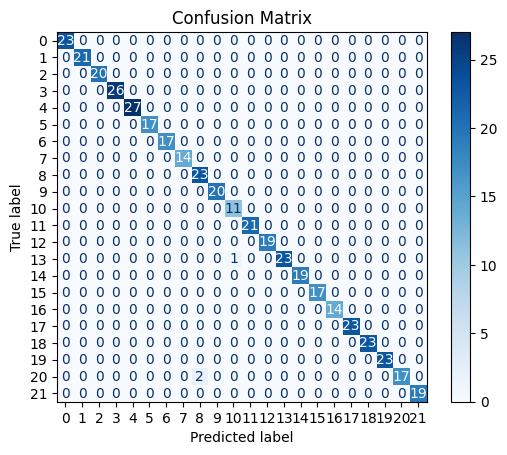

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)

# Display it
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='d')  # 'd' = show counts as integers
plt.title("Confusion Matrix")
plt.show()